In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
driver = webdriver.Chrome()
df = pd.DataFrame(columns=['Date', 'Poster', 'Replies', 'Views'])
START_URL = "https://www.1point3acres.com/bbs/forum.php?mod=forumdisplay&fid=237&orderby=dateline&sortid=320&orderby=dateline&sortid=320&filter=author&page="

In [3]:
def get_referrals(driver, START_URL, start_page_num, end_page_num):   
    refers = []
    # scrape the data from the page 1 to 50
    for i in range(start_page_num, end_page_num+1):
        url = START_URL + str(i)
        driver.get(url)
        soup = BeautifulSoup(driver.page_source, 'lxml')
        posts = soup.find_all('tbody', id=re.compile("normalthread_")) 
#         print(f'{len(posts)} posts to be scraped')

        # get list of referral data for each page
        for p in posts:
            # Date
            if p.find(class_='by').find('span').span is None:
                date = pd.to_datetime(p.find(class_='by').find('span').text)
            else: date = pd.to_datetime(p.find(class_='by').find('span').find('span')['title'])


            # Poster. 有匿名用户。
            try:
                poster = p.find(class_='by').find('a').text
            except:
                poster = "NA"

            # 回复
            reply = int(p.find(class_='num').find('a').text)

            # 查看
            view = int(p.find(class_='num').find('em').text)
            dict = {'Date': date, 'Poster': poster, 'Replies': reply, 'Views': view}
#             print(dict)
            refers.append(dict)
    return refers
        

In [4]:
refers = get_referrals(driver, START_URL, 1, 232)

In [5]:
df = df.append(refers, ignore_index=True)

In [6]:
for col in ['Views', 'Replies']:
    df[col] = pd.to_numeric(df[col])
    
df.dtypes

Date       datetime64[ns]
Poster             object
Replies             int64
Views               int64
dtype: object

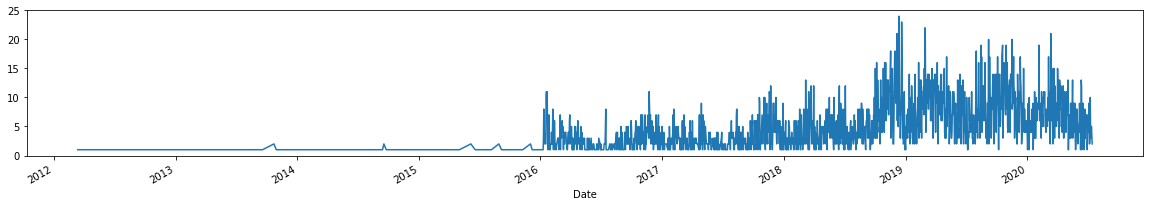

In [14]:
df.groupby('Date').count()['Poster'].plot(figsize=(20, 3))

In [8]:
df.shape

(8091, 4)

In [9]:
df.dtypes

Date       datetime64[ns]
Poster             object
Replies             int64
Views               int64
dtype: object

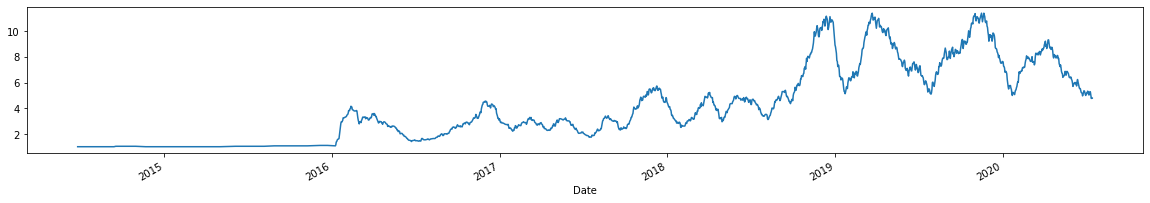

In [13]:
df_new = df.groupby('Date').count()
df_new.rolling(30).mean()['Poster'].plot(figsize=(20, 3))

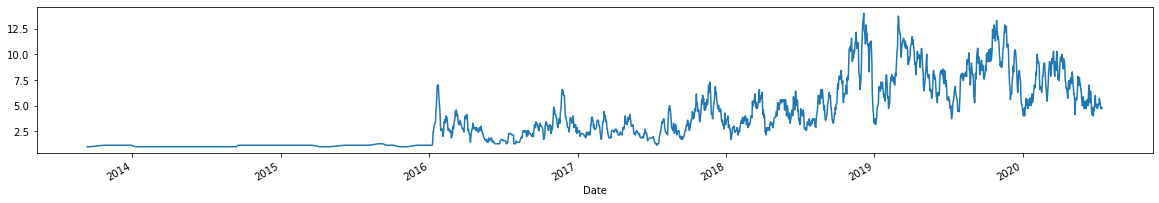

In [15]:
df_new.rolling(7).mean()['Poster'].plot(figsize=(20, 3))

In [11]:
df.to_csv('offer.csv')

In [12]:
type(df_new)

pandas.core.frame.DataFrame